In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
input_path_questions="C:\\Users\\Farima\\OneDrive\\Data\\PhD\\StackOverFlow-data\\Posts\\FinalCsvFiles\\QuestionsPosts_2017_2020.csv"
input_path_answers="C:\\Users\\Farima\\OneDrive\\Data\\PhD\\StackOverFlow-data\\Posts\\FinalCsvFiles\\AnswersPosts_2017_2020.csv"

In [33]:
data_q=pd.read_csv(input_path_questions,names=["RowId","CreateDate","Score","ViewCount","LastEditDate","LastActivityDate","AnswerCount","CommentCount","FavoritCount","AcceptedAnswerId"])
data_q.head()

,RowId,CreateDate,Score,ViewCount,LastEditDate,LastActivityDate,AnswerCount,CommentCount,FavoritCount,AcceptedAnswerId
0,41412454,2017-01-01T00:00:04.523,1,98,2017-01-01T08:59:29.900,2017-09-04T16:46:00.153,0,6,0,NaN
1,41412456,2017-01-01T00:00:39.710,-1,157,2017-01-01T00:08:20.607,2017-01-01T01:11:04.750,1,2,0,41412707.0
2,41412462,2017-01-01T00:02:06.737,4,617,2017-01-01T00:02:06.737,2017-03-10T11:13:04.783,1,0,0,NaN
3,41412463,2017-01-01T00:02:29.813,1,985,2017-01-01T00:18:43.323,2017-01-01T00:51:06.773,1,4,0,41412502.0
4,41412468,2017-01-01T00:03:39.970,0,114,2017-01-01T00:03:39.970,2017-01-01T01:03:25.117,1,2,0,41412618.0


In [34]:
data_a=pd.read_csv(input_path_answers,names=["RowId","CreateDate","Score","ViewCount","LastEditDate","LastActivityDate","AnswerCount","CommentCount","FavoritCount","ParentId"])
data_a.head()

,RowId,CreateDate,Score,ViewCount,LastEditDate,LastActivityDate,AnswerCount,CommentCount,FavoritCount,ParentId
0,41412453,2017-01-01T00:00:01.343,1,0,2017-01-03T13:51:57.170,2017-01-03T13:51:57.170,0,3,0,41412359
1,41412455,2017-01-01T00:00:12.243,2,0,2017-05-23T11:47:07.663,2017-01-01T00:00:12.243,0,4,0,41412413
2,41412458,2017-01-01T00:01:24.430,1,0,2020-06-20T09:12:55.060,2017-01-01T00:01:24.430,0,0,0,41412344
3,41412459,2017-01-01T00:01:41.543,1,0,2017-01-01T01:27:02.057,2017-01-01T01:27:02.057,0,0,0,40280895
4,41412461,2017-01-01T00:01:44.853,1,0,2017-01-01T00:01:44.853,2017-01-01T00:01:44.853,0,0,0,41412388


In [35]:
def getYearlyMonthlyCreation(data):
    data["CreateDate"] = pd.to_datetime(data["CreateDate"])
    print(data.head())
    data["CreateYear"]=data['CreateDate'].map(lambda x: x.year)
    print(data.head())
    data["CreateMonth"]=data['CreateDate'].map(lambda x: x.month)
    print(data.head())
    data["CreateYearMonth"]=data["CreateYear"].astype(str) +"-"+ data["CreateMonth"].astype(str)
    print(data.head())
    data['CreateYearMonth'] = pd.to_datetime(data['CreateYearMonth'])
    print(data.head())
    creation_yearly_monthly = pd.DataFrame(data[["RowId", "CreateYearMonth"]])
    print(creation_yearly_monthly.head())
    yearly_monthly_grp=creation_yearly_monthly.groupby(by=['CreateYearMonth']).size().reset_index(name='counts')
    yearly_monthly_grp.head()
    return yearly_monthly_grp

In [36]:
yearly_monthly_ques=getYearlyMonthlyCreation(data_q)

      RowId              CreateDate  Score  ViewCount  \
0  41412454 2017-01-01 00:00:04.523      1         98   
1  41412456 2017-01-01 00:00:39.710     -1        157   
2  41412462 2017-01-01 00:02:06.737      4        617   
3  41412463 2017-01-01 00:02:29.813      1        985   
4  41412468 2017-01-01 00:03:39.970      0        114   

              LastEditDate         LastActivityDate  AnswerCount  \
0  2017-01-01T08:59:29.900  2017-09-04T16:46:00.153            0   
1  2017-01-01T00:08:20.607  2017-01-01T01:11:04.750            1   
2  2017-01-01T00:02:06.737  2017-03-10T11:13:04.783            1   
3  2017-01-01T00:18:43.323  2017-01-01T00:51:06.773            1   
4  2017-01-01T00:03:39.970  2017-01-01T01:03:25.117            1   

   CommentCount  FavoritCount  AcceptedAnswerId  
0             6             0               NaN  
1             2             0        41412707.0  
2             0             0               NaN  
3             4             0        41412502.0 

In [37]:
yearly_monthly_ans=getYearlyMonthlyCreation(data_a)

      RowId              CreateDate  Score  ViewCount  \
0  41412453 2017-01-01 00:00:01.343      1          0   
1  41412455 2017-01-01 00:00:12.243      2          0   
2  41412458 2017-01-01 00:01:24.430      1          0   
3  41412459 2017-01-01 00:01:41.543      1          0   
4  41412461 2017-01-01 00:01:44.853      1          0   

              LastEditDate         LastActivityDate  AnswerCount  \
0  2017-01-03T13:51:57.170  2017-01-03T13:51:57.170            0   
1  2017-05-23T11:47:07.663  2017-01-01T00:00:12.243            0   
2  2020-06-20T09:12:55.060  2017-01-01T00:01:24.430            0   
3  2017-01-01T01:27:02.057  2017-01-01T01:27:02.057            0   
4  2017-01-01T00:01:44.853  2017-01-01T00:01:44.853            0   

   CommentCount  FavoritCount  ParentId  
0             3             0  41412359  
1             4             0  41412413  
2             0             0  41412344  
3             0             0  40280895  
4             0             0  4141238

Text(0, 0.5, 'Question Post Creations')

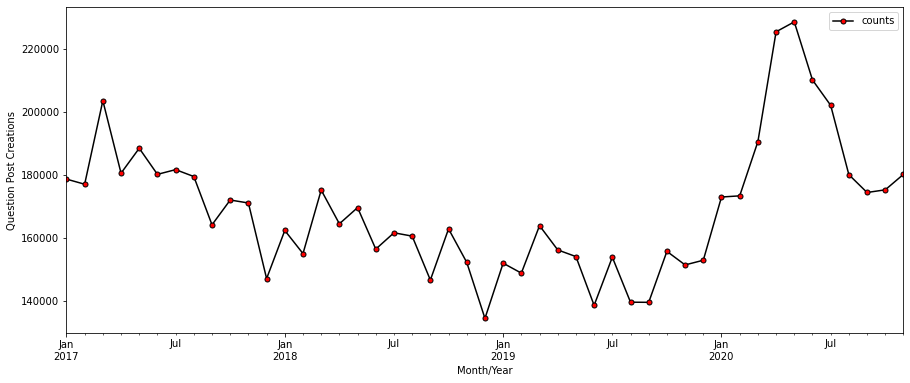

In [38]:
yearly_monthly_ques.plot(x='CreateYearMonth',y='counts',figsize=(15,6),linestyle='-',
                         marker='.', markerfacecolor='r',color='black',markersize=10)
# plt.rcParams.update({'font.size': 12})
plt.xlabel('Month/Year')
plt.ylabel('Question Post Creations')

Text(0, 0.5, 'Answer Post Creations')

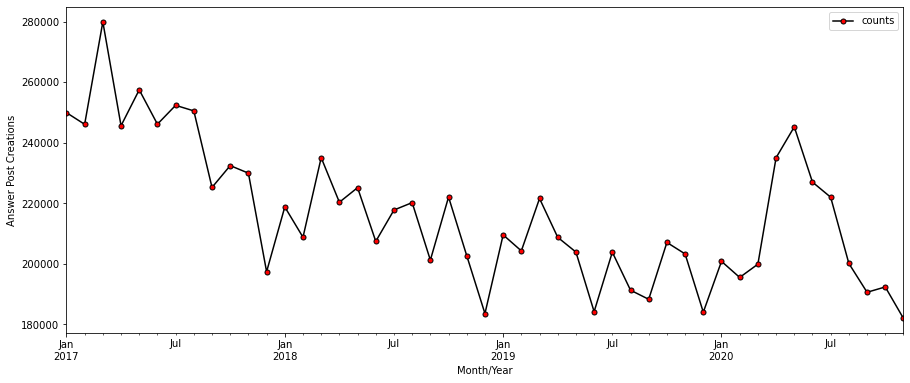

In [39]:
yearly_monthly_ans.plot(x='CreateYearMonth',y='counts',figsize=(15,6),linestyle='-',
                         marker='.', markerfacecolor='r',color='black',markersize=10)
# plt.rcParams.update({'font.size': 12})
plt.xlabel('Month/Year')
plt.ylabel('Answer Post Creations')